In [ ]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 867 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 163 kB 9.6 MB/s 
  Created wheel for openai: filename=openai-0.19.0-py3-none-any.whl size=53535 sha256=e67ee968ef287abd3ee695c8cbac097cd6ef5a9c8f1a8a970129b51664b85baa
  Stored in directory: /root/.cache/pip/wheels/94/b5/c0/928013bd6418b23b9c5d89fb24cdeb1faae899c11377d69609
Successfully built openai


In [ ]:
import os
import openai
import configparser

In [ ]:
config = configparser.ConfigParser()
config.read("config.ini")
openai.api_key = config['OPENAI']['SECRETKEY']

In [ ]:
def deleteFile(id):

    return_ = openai.File.delete(id)

    if (return_['deleted']):
        print("Arquivo %s deletado." % id)
    else:
        print("Arquivo %s não deletado." % id)



In [ ]:
def createFile(input):


    data_file = openai.File.create(
        file=open(input),
        purpose="answers"
    )

    print("Arquivo %s criado." % data_file['id'])

    return data_file

O método makeAnswer encapsula a função que envia os dados para a OpenAI e retorna a resposta. Para isso, precisamos informar qual o `input_file` (arquivo com os pares perguntas e respostas) e a `question` (a pergunta que será enviada).

In [ ]:
def makeAnswer(input_file, question, example_context, examples):

    try:
        return_ = openai.Answer.create(
            search_model="davinci",
            model="davinci",
            question=question,
            file=input_file,
            examples_context=example_context,
            examples=examples,
            max_tokens=50,
            stop=["\n", "<|endoftext|>"]
        )
    except Exception as e:
        print("Não foi possível responder a sua pergunta.")
        print(e)
        return_ = []

    
    return return_['answers'][0]

    

## Exemplo simples de conversação.

Para esse exemplo, vamos utilizar o arquivo `data.jsonl` que está na pasta `datasets/conversation`. Ele tem alguns pares de perguntas e respostas sobre uma pessoa. A idéia é verificar se com esse conjunto de textos, a máquina consegue responder as perguntas. 

In [ ]:
# Cria o arquivo para conversação.
dataFile = createFile("data.jsonl")

Arquivo file-GhnBqfMWXQYStvennVqTdsTT criado.


Vamos fazer algumas perguntas: 

* Qual a profissão de João e onde ele trabalha?
* Com quem João é casado?
* O que a esposa de João faz?
* João pretende ter filhos?
* O que João gosta de assistir? 
* João gosta de assistir Friends. E sua esposa? 
* João ama quem? 
* Qual o nome do filho de João?


In [ ]:
example_context_1 = "João gosta de assistir a série Friends."
examples_1 = [["O que João assiste na TV?","A série Frieds."]]

In [ ]:
makeAnswer(dataFile['id'],'Qual a profissão de João e onde ele trabalha?', example_context_1, examples_1)

'Ele é professor universitário.'

# Exemplo com uma base maior

Vamos trabalhar com um contexto um pouco diferente. A proposta é criar um arquivo com uma série de perguntas e respostas sobre um determinado filme e ver como o modelo responde a perguntas relacionadas. Para montar o arquivo `starwars.jsonl`, utilizei algumas das perguntas e respostas disponíveis nestes links: 

* https://parade.com/1161189/alexandra-hurtado/star-wars-trivia/.
* https://bigquizthing.com/blog-post/star-wars-trivia-questions-for-fun-game-night/

In [ ]:
# Limpando a lista de arquivos e criando o arquivo com os dados da conversação.
dataFile2 = createFile("starwars.jsonl")

Arquivo file-wXGlqQETTzMzbsUOaVVhDlBi criado.


In [ ]:
example_context_2 = "Star Wars is a famous movie's serie. There are a lot of fans around the world"
examples_2 = [["What is Star Wars?","A famous movie's serie."]]

makeAnswer(dataFile2['id'],'What you know about Anakin Skywalker?', example_context_2, examples_2)

'He is a famous Jedi.'

#Projeto do GLIDE da Open Ai

##Sobre o Projeto:

Sobre o GLIDE da OpenAI
A OpenAI lançou o GLIDE (Guided Language-to-Image Diffusion for Generation and Editing). Este modelo de difusão alcança desempenho comparável ao DALL-E apesar de utilizar apenas um terço dos parâmetros.

Embora a maioria dos recursos visuais possa ser descrita em palavras, a produção de imagens a partir de entradas de texto exige habilidades específicas e muitas horas de trabalho. Habilitar um agente de IA para criar automaticamente imagens fotorrealistas a partir de prompts de linguagem natural oferece às pessoas uma facilidade incomparável na criação de material visual rico e diversificado e permite um refinamento iterativo mais simples e um gerenciamento refinado das imagens criadas.

Além de produzir imagens a partir de texto, o GLIDE pode ser usado para alterar imagens existentes usando prompts de texto em linguagem natural para inserir novos objetos, adicionar sombras e reflexos, conduzir imagens na pintura e assim por diante. Ele também pode converter desenhos de linha básicos em fotos fotorrealistas e possui recursos poderosos de produção e reparo de amostra zero para circunstâncias complicadas.

Avaliadores humanos preferiram as imagens de saída do GLIDE às do DALL-E, embora seja um modelo consideravelmente menor, pois é 3,5 bilhões contra os 12 bilhões de parâmetros do DALL-E. Além disso, o GLIDE precisa de um atraso de amostragem menor e não requer reordenamento do CLIP.

Fonte: https://www.marktechpost.com/2021/12/29/openai-introduces-glide-model-for-photorealistic-image-generation/

##GLIDE por capturas de tela do OpenAI


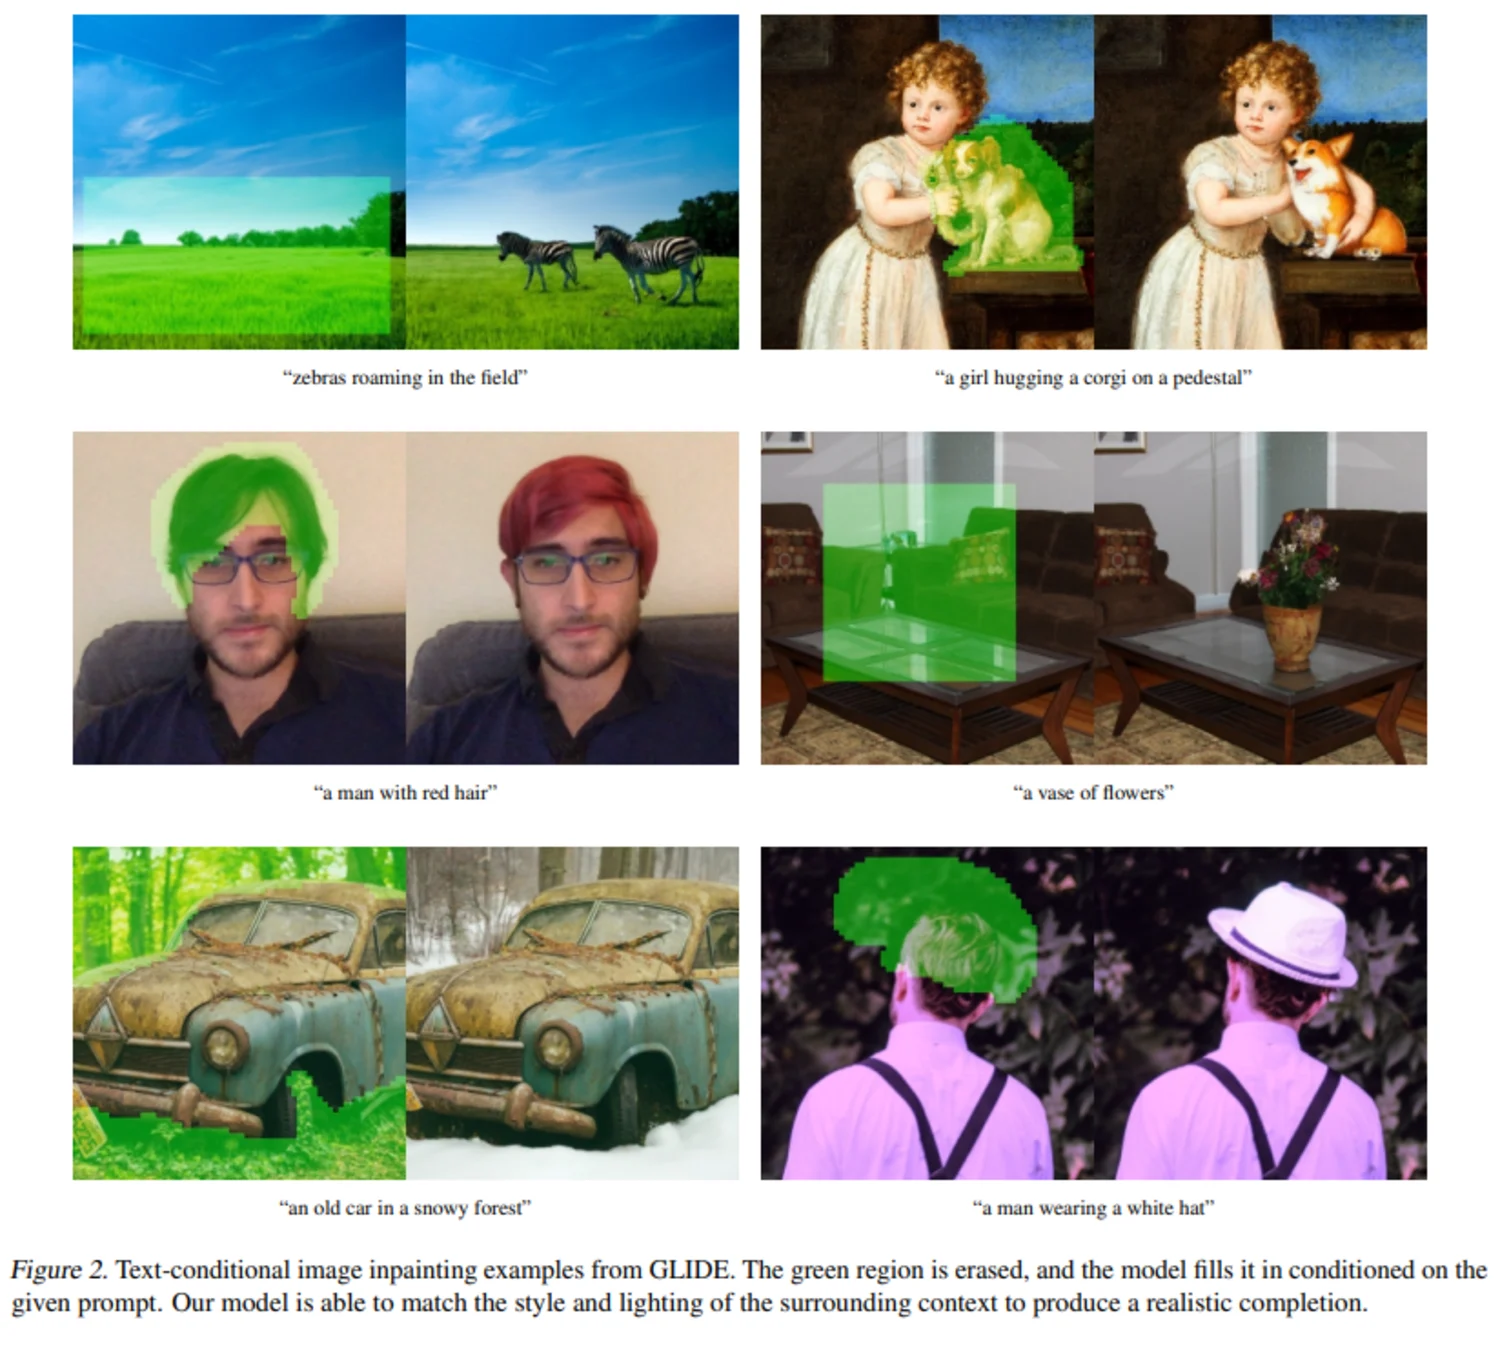

References:
- https://github.com/openai/glide-text2im
- https://github.com/woctezuma/glide-text2im-colab

### Install package

In [ ]:
%cd /content
!git clone https://github.com/openai/glide-text2im.git
%cd /content/glide-text2im
!pip install -q -e .

/content
fatal: destination path 'glide-text2im' already exists and is not an empty directory.
/content/glide-text2im


### Set-up functions, models and options

In [ ]:
from PIL import Image
from IPython.display import display
import torch as th

from glide_text2im.download import load_checkpoint
from glide_text2im.model_creation import (
    create_model_and_diffusion,
    model_and_diffusion_defaults,
    model_and_diffusion_defaults_upsampler
)

In [ ]:
# This notebook supports both CPU and GPU.
# On CPU, generating one sample may take on the order of 20 minutes.
# On a GPU, it should be under a minute.

has_cuda = th.cuda.is_available()
device = th.device('cpu' if not has_cuda else 'cuda')

In [ ]:
# Create base model.
options = model_and_diffusion_defaults()
options['use_fp16'] = has_cuda
options['timestep_respacing'] = '100' # use 100 diffusion steps for fast sampling
model, diffusion = create_model_and_diffusion(**options)
model.eval()
if has_cuda:
    model.convert_to_fp16()
model.to(device)
model.load_state_dict(load_checkpoint('base', device))
print('total base parameters', sum(x.numel() for x in model.parameters()))

  0%|          | 0.00/1.54G [00:00<?, ?iB/s]

total base parameters 385030726


In [ ]:
# Create upsampler model.
options_up = model_and_diffusion_defaults_upsampler()
options_up['use_fp16'] = has_cuda
options_up['timestep_respacing'] = 'fast27' # use 27 diffusion steps for very fast sampling
model_up, diffusion_up = create_model_and_diffusion(**options_up)
model_up.eval()
if has_cuda:
    model_up.convert_to_fp16()
model_up.to(device)
model_up.load_state_dict(load_checkpoint('upsample', device))
print('total upsampler parameters', sum(x.numel() for x in model_up.parameters()))

  0%|          | 0.00/1.59G [00:00<?, ?iB/s]

total upsampler parameters 398361286


In [ ]:
def show_images(batch: th.Tensor):
    """ Display a batch of images inline. """
    scaled = ((batch + 1)*127.5).round().clamp(0,255).to(th.uint8).cpu()
    reshaped = scaled.permute(2, 0, 3, 1).reshape([batch.shape[2], -1, 3])
    display(Image.fromarray(reshaped.numpy()))

### Sample at 64x64 resolution

  0%|          | 0/100 [00:00<?, ?it/s]

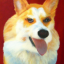

In [ ]:
#@title Sample from the base model
prompt = "an oil painting of a corgi"  #@param {type:"string"}

# Sampling parameters
batch_size =  1#@param {type:"integer"}
guidance_scale = 3.0 #@param {type:"number"}

# Tune this parameter to control the sharpness of 256x256 images.
# A value of 1.0 is sharper, but sometimes results in grainy artifacts.
upsample_temp = 0.997 #@param {type:"number"}

##############################
# Sample from the base model #
##############################

# Create the text tokens to feed to the model.
tokens = model.tokenizer.encode(prompt)
tokens, mask = model.tokenizer.padded_tokens_and_mask(
    tokens, options['text_ctx']
)

# Create the classifier-free guidance tokens (empty)
full_batch_size = batch_size * 2
uncond_tokens, uncond_mask = model.tokenizer.padded_tokens_and_mask(
    [], options['text_ctx']
)

# Pack the tokens together into model kwargs.
model_kwargs = dict(
    tokens=th.tensor(
        [tokens] * batch_size + [uncond_tokens] * batch_size, device=device
    ),
    mask=th.tensor(
        [mask] * batch_size + [uncond_mask] * batch_size,
        dtype=th.bool,
        device=device,
    ),
)

# Create a classifier-free guidance sampling function
def model_fn(x_t, ts, **kwargs):
    half = x_t[: len(x_t) // 2]
    combined = th.cat([half, half], dim=0)
    model_out = model(combined, ts, **kwargs)
    eps, rest = model_out[:, :3], model_out[:, 3:]
    cond_eps, uncond_eps = th.split(eps, len(eps) // 2, dim=0)
    half_eps = uncond_eps + guidance_scale * (cond_eps - uncond_eps)
    eps = th.cat([half_eps, half_eps], dim=0)
    return th.cat([eps, rest], dim=1)

# Sample from the base model.
model.del_cache()
samples = diffusion.p_sample_loop(
    model_fn,
    (full_batch_size, 3, options["image_size"], options["image_size"]),
    device=device,
    clip_denoised=True,
    progress=True,
    model_kwargs=model_kwargs,
    cond_fn=None,
)[:batch_size]
model.del_cache()

show_images(samples)

### Upsample to 256x256 resolution

  0%|          | 0/27 [00:00<?, ?it/s]

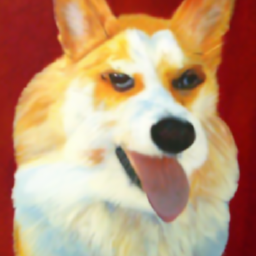

In [ ]:
#@title Upsample the 64x64 samples
##############################
# Upsample the 64x64 samples #
##############################

tokens = model_up.tokenizer.encode(prompt)
tokens, mask = model_up.tokenizer.padded_tokens_and_mask(
    tokens, options_up['text_ctx']
)

# Create the model conditioning dict.
model_kwargs = dict(
    # Low-res image to upsample.
    low_res=((samples+1)*127.5).round()/127.5 - 1,

    # Text tokens
    tokens=th.tensor(
        [tokens] * batch_size, device=device
    ),
    mask=th.tensor(
        [mask] * batch_size,
        dtype=th.bool,
        device=device,
    ),
)

# Sample from the base model.
model_up.del_cache()
up_shape = (batch_size, 3, options_up["image_size"], options_up["image_size"])
up_samples = diffusion_up.ddim_sample_loop(
    model_up,
    up_shape,
    noise=th.randn(up_shape, device=device) * upsample_temp,
    device=device,
    clip_denoised=True,
    progress=True,
    model_kwargs=model_kwargs,
    cond_fn=None,
)[:batch_size]
model_up.del_cache()


show_images(up_samples)